# Домашнее задание к лекции «Корреляция и корреляционный анализ»

## Задание
## Преподаватель: Олег Булыгин

### 1. Возьмите датасет Mortality and Water Hardness  
www.kaggle.com...r-hardness  

Дополнительно будет выложен в ЛК  
В этом датасете содержатся данные по средней годовой смертности на  
100000 населения и концентрации кальция в питьевой воде для 61  
большого города в Англии и Уэльсе. Города дополнительно поделены на  
северные и южные.  

### 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  
### 3 Задание.  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

In [96]:
import pandas as pd
import seaborn as sns

In [97]:
dataset = pd.read_csv('Data/water.csv')

In [98]:
dataset.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


## 2 Задача - ответить на вопрос: "Есть ли связь между жёсткостью воды и средней годовой смертностью?"

### 1. Точечный график

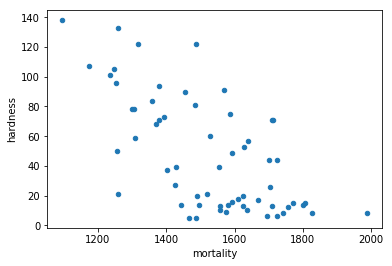

In [99]:
dataset.plot(kind='scatter', x='mortality', y='hardness')

### 2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [100]:
dataset[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [101]:
dataset[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


### 3. Построить модель линейной регрессии

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [103]:
X = dataset[['mortality']]
y = dataset[['hardness']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

#### Коэффициент детерминации:

In [107]:
model.score(X_test, y_test) 

0.4948982822876836

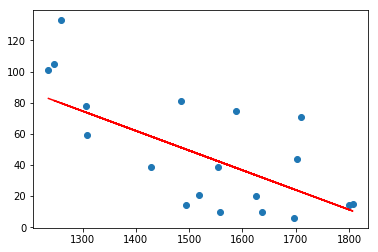

In [108]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [109]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [111]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [112]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        14:57:25   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

### Коэффициент детерминации:

R2 = 0.397

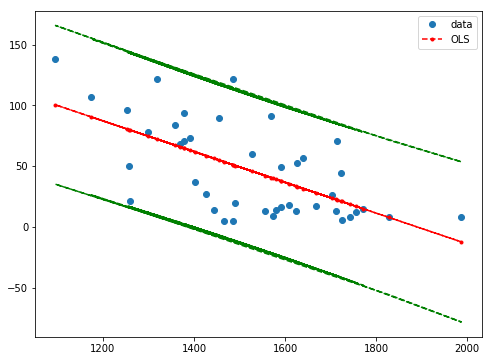

In [113]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

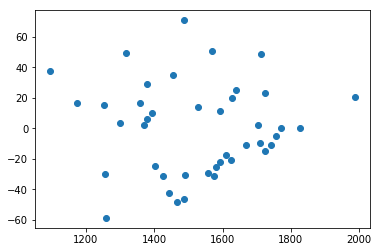

In [114]:
# Посмотрим на остатки:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <a list of 10 Patch objects>)

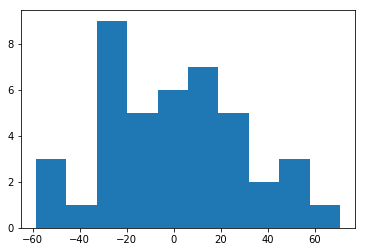

In [115]:
# Гистограмма:
plt.hist(results.resid)

## Анализ для южных городов:

In [116]:
dataset_south = dataset.copy()
dataset_south = dataset_south[dataset_south['location'] == 'South']

### 1. Точечный график

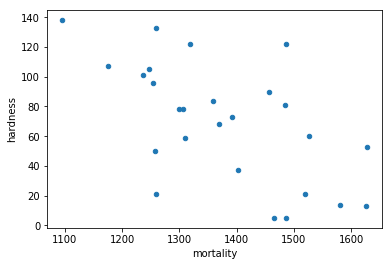

In [117]:
dataset_south.plot(kind='scatter', x='mortality', y='hardness')

### 2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [118]:
dataset_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [119]:
dataset_south[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


### 3. Построить модель линейной регрессии

In [120]:
X = dataset_south[['mortality']]
y = dataset_south[['hardness']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [122]:
X_const = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           7.30e-05
Time:                        14:57:34   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


### Коэффициент детерминации:

R2 = 0.636

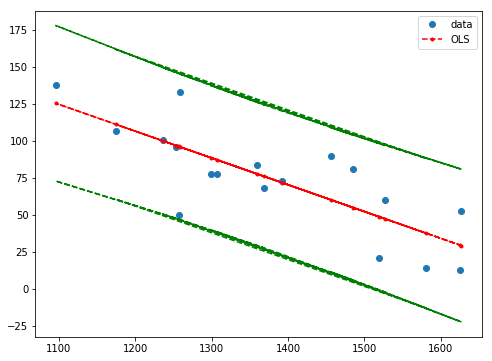

In [124]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

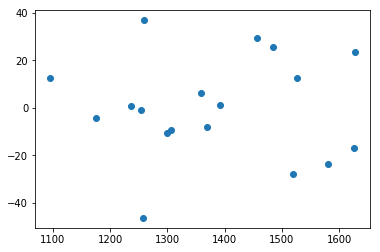

In [125]:
# График остатков:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 2., 1., 3., 4., 1., 2., 2., 2.]),
 array([-46.44102675, -38.10480112, -29.7685755 , -21.43234987,
        -13.09612425,  -4.75989863,   3.576327  ,  11.91255262,
         20.24877825,  28.58500387,  36.92122949]),
 <a list of 10 Patch objects>)

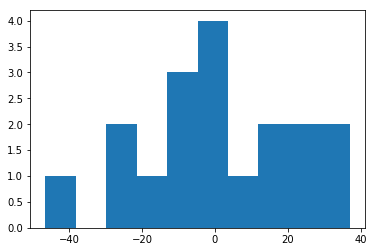

In [126]:
# Гистограмма:
plt.hist(results.resid)

## Анализ для северных городов:

In [127]:
dataset_north = dataset.copy()
dataset_north = dataset_north[dataset_north['location'] == 'North']

### 1. Точечный график

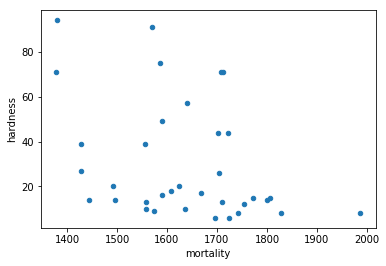

In [128]:
dataset_north.plot(kind='scatter', x='mortality', y='hardness')

### 2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [129]:
dataset_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [130]:
dataset_north[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


### 3. Построить модель линейной регрессии

In [131]:
X = dataset_north[['mortality']]
y = dataset_north[['hardness']]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [133]:
X_const = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [134]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Fri, 18 Jun 2021   Prob (F-statistic):             0.0316
Time:                        14:57:43   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

### Коэффициент детерминации:

R2 = 0.193

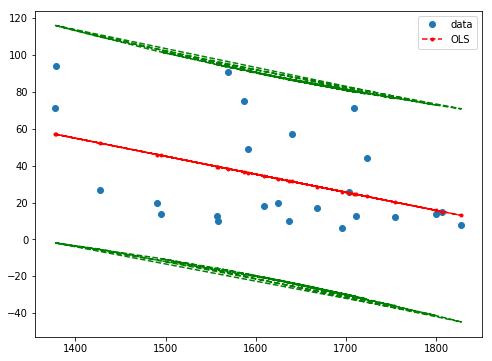

In [135]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

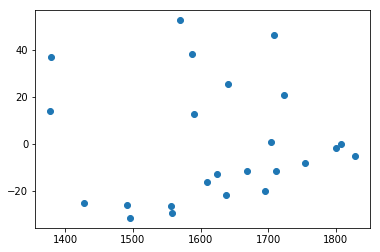

In [136]:
# График остатков:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([5., 3., 4., 4., 0., 2., 2., 0., 2., 2.]),
 array([-31.60341826, -23.18012614, -14.75683401,  -6.33354188,
          2.08975025,  10.51304238,  18.93633451,  27.35962664,
         35.78291877,  44.2062109 ,  52.62950303]),
 <a list of 10 Patch objects>)

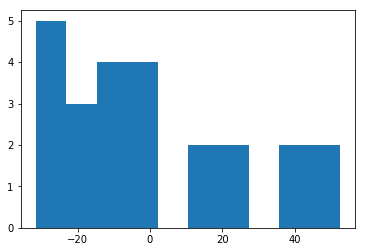

In [137]:
# Гистограмма:
plt.hist(results.resid)

# Выводы:

#### Точечные графики 
позволяют сделать предположение о том, что зависимость может быть линейной. Особенно для полного датасета и для южных городов. 

#### Коэффициент Спирмена:
* -0.631665 для полного датасета  
* -0.595723 для южных городов 
* -0.404208 для северных городов  
    

#### Коэффициент Пирсона:
* -0.654849 для полного датасета 
* -0.602153 для южных городов 
* -0.368598 для северных городов 

Значения критериев Спирмена и Пирсона близки. Максимальные значения для полного датасета, минимальные - для северных городов.
Коэффициент отрицательный - это значит, что имеет место обратная связь. Связь тем сильнее, чем ближе модуль значения коэффициениа к единице. 
Связь наиболее сильная для полного датасета.
Связь определенно есть, но не высокая.

#### Коэффициент детерминации:  
* 0.397 для полного датасета  
* 0.636 для южных городов  
* 0.193 для северных городов  

Получается, что наилучшим образом модель линейной регрессии описывает зависимость величин в датасете для южных городов.  
Хуже всего - для северных. Результат для полного датасета находится между этими значениями, что, в принципе, логично.



Судя по графикам, остатки достаточно хаотичны,в основном, довольно далеки от нормального распределения. Визуально, если судить по гистограмме, наиболее близки к нормальному распределеню остатки для модели для датасета южных городов.

Общий вывод: связь между жесткостью воды и смертностью в датасетах есть. Наиболее сильно она проявляется для датасета южных городоы, и очень слабо - для датасета по северным городам (можно сказать, что её можно не принимать во внимание). Однако даже результаты для датасетам для южных городов показывают что, связь хоть и заметная, но не очень сильная.
Модель линейной регрессии в данном случае не может идеально описать взаимосвязь величин.